In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import math
import random

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn import metrics

import gc; gc.enable()

import warnings
warnings.filterwarnings("ignore")

In [112]:
df = pd.read_csv('kc_house_data.csv')

In [113]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


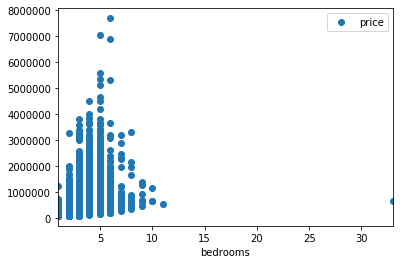

In [73]:
df.plot(x='bedrooms', y='price', style='o')

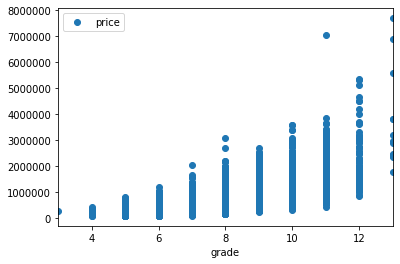

In [74]:
df.plot(x='grade', y='price', style='o')

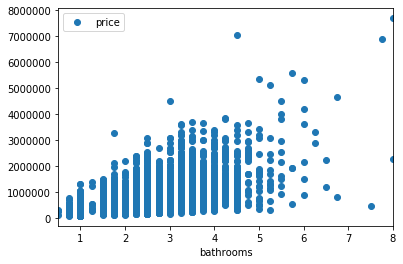

In [75]:
df.plot(x='bathrooms', y='price', style='o')

In [4]:
# df['id'].value_counts()

In [5]:
# df.loc[df['id']==795000620]

In [6]:
# df['bedrooms'].value_counts()

In [7]:
# df.loc[df['bedrooms']==33]

In [114]:
df['bedrooms'].replace(to_replace = 33, value =3 , inplace=True)

In [9]:
# df.loc[df['id']==2402100895]

In [10]:
# df['bathrooms'].value_counts()

In [115]:
pd.options.display.max_columns=100

In [12]:
# df.sort_values(by=['yr_built'],ascending=False)
# df['yr_built'].value_counts()
# df.loc[df['yr_built']==1900]

In [13]:
# df_test = df.duplicated(subset=None, keep='first')

In [14]:
# df_test.value_counts()

In [15]:
# df.isna().sum()

In [16]:
# df['waterfront'].unique()

In [17]:
# df['waterfront'].value_counts()

In [116]:
df['waterfront'].fillna(value=0,inplace=True)

In [19]:
# df['waterfront'].value_counts()

In [117]:
df['yr_renovated'].fillna(value=0,inplace=True)

In [21]:
# df.isna().sum()

In [118]:
df.dropna(subset=['view'],inplace=True)

In [119]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [120]:
df['sqft_basement'].replace(to_replace = '?', value = df['sqft_living'] - df['sqft_above'], inplace=True)

In [25]:
# df['sqft_basement'].unique()

In [121]:
df['sqft_basement'] = df['sqft_basement'].astype("float32")

In [122]:
df1 = df.drop(columns=['date'])

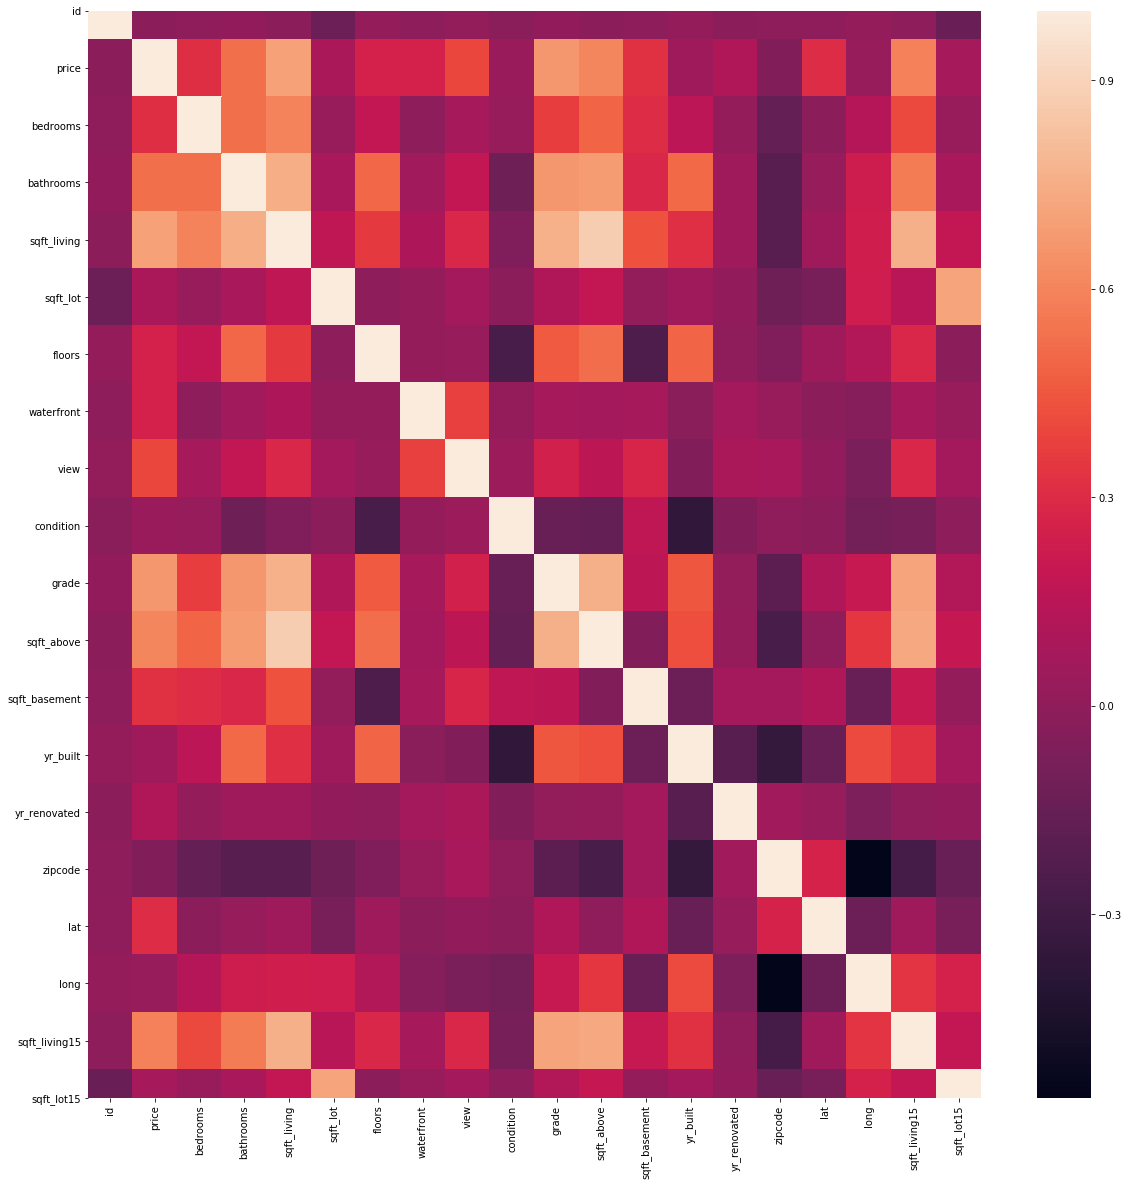

In [123]:
plt.figure(figsize = (20,20))
sns.heatmap(df1.corr())

In [124]:
target = "price"
used_cols = [c for c in df1.columns.to_list() if c not in [target]]

X = df1[used_cols]
y = df1[target]

In [125]:
df.corr()[target].abs().sort_values(ascending=False)

price            1.000000
sqft_living      0.701587
grade            0.668307
sqft_above       0.605695
sqft_living15    0.585304
bathrooms        0.525053
view             0.395734
sqft_basement    0.321816
bedrooms         0.315229
lat              0.307868
waterfront       0.259220
floors           0.257052
yr_renovated     0.117982
sqft_lot         0.090338
sqft_lot15       0.083189
yr_built         0.054273
zipcode          0.053620
condition        0.035393
long             0.022417
id               0.017392
Name: price, dtype: float64

In [88]:
# result = pd.DataFrame({'Model': [],
#                         'Details':[],
#                         'Root Mean Squared Error (RMSE)':[],
#                         'R-squared (train)':[],
#                         'R-squared (test)':[],
#                         '3-Fold Cross Validation':[]})

In [127]:
scaler = RobustScaler()
lr = LinearRegression()
pipe1 = make_pipeline(scaler, lr)

metrics = ['r2', 'neg_mean_squared_error']
    
cv = cross_validate(pipe1, X, y, cv=3, n_jobs=-1, scoring=metrics,return_train_score=True)

In [129]:
sorted(cv.keys())

['fit_time',
 'score_time',
 'test_neg_mean_squared_error',
 'test_r2',
 'train_neg_mean_squared_error',
 'train_r2']

In [131]:
cv['test_r2'].mean()

0.6954963579543829

In [132]:
cv['train_r2'].mean()

0.7014500841259427

## Column Transformation

In [133]:
df2 = df1.copy()
df2.drop(columns=['sqft_above','sqft_basement'],inplace=True)


In [134]:
df2

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,2004,0.0,98027,47.5345,-122.069,1410,1287


In [135]:
used_cols1 = [c for c in df2.columns.to_list() if c not in [target]]

X1 = df2[used_cols1]
y1 = df2[target]
scaler = RobustScaler()
lr = LinearRegression()
pipe1 = make_pipeline(scaler, lr)

metrics = ['r2', 'neg_mean_squared_error']
    
cv1 = cross_validate(pipe1, X1, y1, cv=3, n_jobs=-1, scoring=metrics,return_train_score=True)

In [138]:
cv1['test_r2'].mean()

0.6952245796001412

In [139]:
cv1['train_r2'].mean()

0.7006093252591246

In [60]:
df['bathrooms'].describe()

count    21534.000000
mean         2.115712
std          0.768602
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [61]:
df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 2.5 , 1.75, 2.75, 1.5 , 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 0.5 , 5.5 , 6.75,
       6.  , 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [62]:
df['bathrooms'].value_counts()

2.50    5364
1.00    3841
1.75    3035
2.25    2037
2.00    1926
1.50    1441
2.75    1185
3.00     752
3.50     730
3.25     585
3.75     155
4.00     136
4.50     100
4.25      77
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       5
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

## Tranforming Data

In [140]:
from sklearn.preprocessing import quantile_transform, QuantileTransformer
from sklearn.compose import TransformedTargetRegressor

In [141]:

X_transformed = pd.DataFrame(quantile_transform(X, n_quantiles=20, # see... binning again! 
                                                output_distribution='normal', 
                                                random_state=42), 
                             columns=used_cols)

X_transformed.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.607114,-0.336038,-1.252120,-1.101506,-0.513771,-5.199338,-5.199338,-5.199338,-0.406724,-0.479506,-0.704369,-5.199338,-0.554923,-5.199338,1.642538,-0.445710,-0.088827,-1.030806,-0.513110
1,0.445755,-0.336038,0.066012,0.688357,-0.119286,0.804596,-5.199338,-5.199338,-0.406724,-0.479506,0.641338,0.490922,-0.699547,3.226360,0.855373,1.188697,-0.591201,-0.249943,0.002748
2,0.334495,-1.412188,-1.252120,-1.795367,0.555303,-5.199338,-5.199338,-5.199338,-0.406724,-1.412188,-1.717274,-5.199338,-1.127221,-5.199338,-0.835371,1.427873,0.005654,1.066239,0.160064
3,-0.523482,0.716498,1.252120,0.053997,-0.704369,-5.199338,-5.199338,-5.199338,5.199338,-0.479506,-1.030806,1.178502,-0.253347,-5.199338,1.047787,-0.390000,-1.646198,-0.976236,-0.735022
4,-0.745040,-0.336038,-0.132313,-0.294441,0.129085,-5.199338,-5.199338,-5.199338,-0.406724,0.406724,0.150484,-5.199338,0.371149,-5.199338,0.066012,0.235993,1.083835,-0.066012,-0.050673


In [142]:
transformer = QuantileTransformer(n_quantiles=20, output_distribution='normal', random_state=42)
lr = LinearRegression()
pipe3 = make_pipeline(transformer, lr)
cv1 = cross_validate(pipe3, X, y, cv=3, n_jobs=-1, scoring=metrics,return_train_score=True)


# scores = cross_val_score(pipe, X, y, cv=5, scoring='r2')
# print("R^2:", scores.mean(), "+/-", scores.std())

In [143]:
cv1['test_r2'].mean()

0.575181327292532

In [144]:
cv1['train_r2'].mean()

0.5819522807618963

In [145]:
ridge = Ridge(alpha=0.5)
pipe4 = make_pipeline(scaler, ridge)

cv3 = cross_validate(pipe4, X, y, cv=3, n_jobs=-1, scoring=metrics,return_train_score=True)

In [147]:
cv3['test_r2'].mean()

0.6955062405390807

In [148]:
cv3['train_r2'].mean()

0.701449520886117

In [149]:
from sklearn.base import TransformerMixin
import vtreat
from pyearth import Earth

ModuleNotFoundError: No module named 'pyearth'

## Binning

In [67]:
# df_dm = df1.copy()

In [68]:
# partition the age into bins
# bins = [0.5,1.75,2.25,2.5,8]
# labels = ['0.5-1.75','1.75-2.25','2.25-2.5','2.5-8']
# df_dm['bathroom_binned'] = pd.cut(df_dm['bathrooms'], bins=bins, labels=labels)

# p1=sns.countplot(df_dm['bathroom_binned'],ax=axes[0])
# for p in p1.patches:
#     height = p.get_height()
#     p1.text(p.get_x()+p.get_width()/2,height + 50,height,ha="center")   

#     # histograms for the binned columns
# f, axes = plt.subplots(1, 2,figsize=(15,5))
# p1=sns.countplot(df_binned['bathroom'],ax=axes[0])
# for p in p1.patches:
#     height = p.get_height()
#     p1.text(p.get_x()+p.get_width()/2,height + 50,height,ha="center")   
# p2=sns.countplot(df_dm['age_rnv_binned'],ax=axes[1])
# sns.despine(left=True, bottom=True)
# for p in p2.patches:
#     height = p.get_height()
#     p2.text(p.get_x()+p.get_width()/2,height + 200,height,ha="center")
    
axes[0].set(xlabel='Bathrooms')
axes[0].yaxis.tick_left()
# axes[1].yaxis.set_label_position("right")
# axes[1].yaxis.tick_right()
# axes[1].set(xlabel='Renovation Age');

# transform the factor values to be able to use in the model
# df_binned = pd.get_dummies(df_binned, columns=['bathrooms'])
df_dm = pd.get_dummies(df_dm, columns=['bathroom_binned'])

TypeError: '<' not supported between instances of 'float' and 'str'

In [41]:
# scaler = RobustScaler()
# lr =  Lasso(alpha=1000)
# pipe2 = make_pipeline(scaler, lr)

# pipe2 = model_evaluate(pipe2,df1)

# r = results.shape[0]
# results.loc[r] = ['Simple Linear Regression','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
# results

In [42]:


# X['lon_times_lan'] = X['lat'] * X['long']
# X['lon_times_lan_sq'] = X['lon_times_lan']**2
# X['lon_times_lan_cubed'] = X['lon_times_lan']**3
# X['bedroom_times_bathroom'] = X['bathrooms'] * X['bedrooms']
# X['bedroom_times_bathroom_sq'] = X['bedroom_times_bathroom']**2
# X['bedroom_times_bathroom_cubed'] = X['bedroom_times_bathroom']**3

# X['lat_sq'] = X['lat']**2
# X['long_sq'] = X['long']**2
# X['lat_cube'] = X['lat']**3
# X['long_sq'] = X['long']**3

# # scores = cross_val_score(pipe1, X, y, cv=5, scoring='neg_root_mean_squared_error')
# # print("RMSE:", -scores.mean(), "+/-", scores.std())

# scores = cross_val_score(pipe1, X, y, cv=5, scoring='r2')
# print("R^2:", scores.mean(), "+/-", scores.std())

In [43]:
# df2 = X

In [44]:
# df2['price'] = y.tolist()

In [45]:
# df2.info()

In [46]:
# scaler = RobustScaler()
# lr = LinearRegression()
# pipe3 = make_pipeline(scaler, lr)

# pipe3 = model_evaluate(pipe3,df2)

# r = results.shape[0]
# results.loc[r] = ['Simple Linear Regression with Transformation','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
# results